# Brittany's Hot Houston Neighborhoods

### For my Capstone, I will be analyzing the neighborhoods of Houston, TX.


### I will be utilizing data from The Houston Association of Realtors, Harris County Appraisal District, Foursquare and the Houston Police Department, Houston Magazine, Frankel building Group, The Chronicle, Home Snacks, and Houston Properties

In [1]:
import numpy as np
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import ssl
import csv
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from functools import reduce
!conda install -c conda-forge beautifulsoup4 --yes
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

Solving environment: done

# All requested packages already installed.



## Import zipcodes
### Clean initial data

In [2]:
zipcode_df = pd.read_csv("houston_neighborhoods.csv",sep=',')
zipcode_df.dropna(axis=1, how='all',inplace =True)
zipcode_df.drop(zipcode_df[zipcode_df.County != 'HARRIS'].index, inplace=True)
zipcode_df = zipcode_df.rename(columns={'Zip Code': 'Zipcode', 'City (City Alias Name(s))':'Name'})
zipcode_df[['Name','Alias']] = zipcode_df['Name'].str.split('(', expand = True)
zipcode_df = zipcode_df.astype({"Zipcode":int})
print(zipcode_df)

     Zipcode                   Name  County  \
0      77002  Houston - Inner Loop   HARRIS   
1      77003  Houston - Inner Loop   HARRIS   
2      77004  Houston - Inner Loop   HARRIS   
3      77005  Houston - Inner Loop   HARRIS   
4      77006  Houston - Inner Loop   HARRIS   
5      77007  Houston - Inner Loop   HARRIS   
6      77008  Houston - Inner Loop   HARRIS   
7      77009  Houston - Inner Loop   HARRIS   
8      77010  Houston - Inner Loop   HARRIS   
9      77011  Houston - Inner Loop   HARRIS   
10     77012  Houston - Inner Loop   HARRIS   
11     77013   Houston - Northeast   HARRIS   
12     77014   Houston - Northwest   HARRIS   
13     77015   Houston - Northeast   HARRIS   
14     77016   Houston - Northeast   HARRIS   
15     77017   Houston - Southeast   HARRIS   
16     77018   Houston - Northwest   HARRIS   
17     77019  Houston - Inner Loop   HARRIS   
18     77020  Houston - Inner Loop   HARRIS   
19     77021  Houston - Inner Loop   HARRIS   
20     77022 

In [3]:
zipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 214
Data columns (total 4 columns):
Zipcode    133 non-null int64
Name       133 non-null object
County     133 non-null object
Alias      106 non-null object
dtypes: int64(1), object(3)
memory usage: 5.2+ KB


### Crime Data

In [4]:
crime_df = pd.read_csv("Houston_Crime_zipcode.csv", sep=',')
crime_df = crime_df.rename(columns={'ZIP Code': 'Zipcode'})
crime_df.dropna(axis=1, how='all',inplace =True)
crime_df = crime_df.replace('-', '', regex=True).astype(int)
crime_df = pd.DataFrame(crime_df.groupby('Zipcode')['Zipcode'].count())
crime_df = crime_df.rename(columns={'Zipcode':'crime_count'})
crime_df = crime_df.reset_index(drop=False)
crime_df.astype('Int64').dtypes
crime_df.head(15)


,Zipcode,crime_count
0,36551,1
1,70535,1
2,70665,1
3,75070,1
4,75241,1
5,77002,4742
6,77003,1929
7,77004,5260
8,77005,1021
9,77006,3669


In [5]:
crime_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 2 columns):
Zipcode        189 non-null int64
crime_count    189 non-null int64
dtypes: int64(2)
memory usage: 3.1 KB


In [6]:
pop_df = pd.read_csv("Zip_pop.csv")
pop_df.dropna(axis=1, how='all',inplace =True)
pop_df = pop_df.replace('ZIP Code', ' ', regex=True).astype(object)
pop_df = pop_df.rename(columns={'ZIP Code': 'Zipcode'})
pop_df = pop_df.astype({"Zipcode":int})
pop_df = pop_df.replace(',', '', regex=True).astype(int)





pop_df.head(15)



,Zipcode,Population
0,77001,0
1,77002,16793
2,77003,10508
3,77004,32692
4,77005,25528
5,77006,19664
6,77007,30853
7,77008,30482
8,77009,38094
9,77010,366


In [7]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Zipcode       97 non-null int64
Population    97 non-null int64
dtypes: int64(2)
memory usage: 1.6 KB


In [8]:
houston_df=pd.merge(zipcode_df, crime_df, on='Zipcode', how='left')
houston_df.Zipcode = houston_df.Zipcode.astype('Int64')
houston_df.crime_count = houston_df.crime_count.astype('Int64')
Htown_df=pd.merge(houston_df, pop_df, on='Zipcode', how='left')
print(Htown_df)

     Zipcode                   Name  County  \
0      77002  Houston - Inner Loop   HARRIS   
1      77003  Houston - Inner Loop   HARRIS   
2      77004  Houston - Inner Loop   HARRIS   
3      77005  Houston - Inner Loop   HARRIS   
4      77006  Houston - Inner Loop   HARRIS   
5      77007  Houston - Inner Loop   HARRIS   
6      77008  Houston - Inner Loop   HARRIS   
7      77009  Houston - Inner Loop   HARRIS   
8      77010  Houston - Inner Loop   HARRIS   
9      77011  Houston - Inner Loop   HARRIS   
10     77012  Houston - Inner Loop   HARRIS   
11     77013   Houston - Northeast   HARRIS   
12     77014   Houston - Northwest   HARRIS   
13     77015   Houston - Northeast   HARRIS   
14     77016   Houston - Northeast   HARRIS   
15     77017   Houston - Southeast   HARRIS   
16     77018   Houston - Northwest   HARRIS   
17     77019  Houston - Inner Loop   HARRIS   
18     77020  Houston - Inner Loop   HARRIS   
19     77021  Houston - Inner Loop   HARRIS   
20     77022 

In [9]:
#Htown_df['capita'] = Htown_df.apply(per_capita, args=(1000,), axis=1)
Htown_df['crime_per_capita'] = Htown_df['crime_count'] / Htown_df['Population'] * 100
Htown_df = Htown_df.sort_values(by=['crime_per_capita'], ascending=[True])
Htown_df.head()

,Zipcode,Name,County,Alias,crime_count,Population,crime_per_capita
91,77095,Houston - Northwest,HARRIS,"HOUSTON,)",8,66502.0,0.012030
64,77068,Houston - Northwest,HARRIS,"HOUSTON,)",3,10064.0,0.029809
61,77065,Houston - Northwest,HARRIS,"HOUSTON,JERSEY VILLAGE,JERSEY VLG,)",13,35326.0,0.036800
69,77073,Houston - Northeast,HARRIS,"HOUSTON,)",31,34790.0,0.089106
37,77039,Houston - Northeast,HARRIS,"ALDINE,HOUSTON,)",31,27562.0,0.112474


In [10]:
lat_df = pd.read_csv("lat.csv")
hou_df = pd.merge(Htown_df, lat_df, on='Zipcode', how='left')
#drop rows based on condition
hou_df = hou_df[hou_df['Latitude'] <= 29.836970]
hou_df = hou_df[hou_df['Latitude'] >= 29.659982]
hou_df = hou_df[hou_df['Longitude'] >= -95.553112]
hou_df = hou_df[hou_df['Longitude'] <= -95.264667]
hou_df = hou_df.sort_values(by=['crime_per_capita'], ascending=[True])

hou_df.head(30)
hou_df.to_csv("hou_crime_result.csv")

In [11]:
limit = 30 
hou_safe = hou_df.iloc[0:limit, :]

In [12]:
h_latitude = 29.7604
h_longitude = -95.3698

In [13]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

# create map and display it
hou_map = folium.Map(location=[h_latitude, h_longitude], zoom_start=12)

# display the map of Houston
hou_map

Solving environment: done

# All requested packages already installed.



In [14]:
from folium import plugins

hou_map = folium.Map(location = [h_latitude, h_longitude], zoom_start = 12)


# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(hou_safe.Latitude, hou_safe.Longitude,):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=9, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
hou_map.add_child(incidents)

### Foursquare

In [15]:
CLIENT_ID = 'WFK0M4ECKHR3KDKBOAT3GENCHPTEUJKJCQBQTMBFMWDBEH3G'
CLIENT_SECRET = 'HGCJUQC5W2C2WHDZZ0YD2PRNBL1JXPPHP1FUO2VLQOJLXHWC' 
VERSION = '20180605' # Foursquare API version

In [16]:
def getNearbyVenues(ID, latitude, longitude, radius=500, limit=100):
    venues_list=[]
    for ID, lat, lng in zip(ID, latitude, longitude):
        print(f"Processing ID: {ID}")
        # create the API request URL
        url = f"""https://api.foursquare.com/v2/venues/explore?&client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&v={VERSION}&ll={lat},{lng}&radius={radius}&limit={limit}"""

        results = requests.get(url).json()["response"]['groups'][0]['items']  # make GET request
        
        # return relevant information for each nearby venue, looping through multiple venues for each ID
        venues_list.append([(
            ID, lat, lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zipcode', 'Zip Latitude', 'Zip Longitude', 
                             'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    return nearby_venues

In [17]:
hou_venues = getNearbyVenues(ID=hou_df['Zipcode'],
                                   latitude=hou_df['Latitude'],
                                   longitude=hou_df['Longitude'])

Processing ID: 77005
Processing ID: 77080
Processing ID: 77012
Processing ID: 77024
Processing ID: 77011
Processing ID: 77087
Processing ID: 77081
Processing ID: 77018
Processing ID: 77055
Processing ID: 77023
Processing ID: 77074
Processing ID: 77025
Processing ID: 77009
Processing ID: 77008
Processing ID: 77096
Processing ID: 77020
Processing ID: 77046
Processing ID: 77036
Processing ID: 77057
Processing ID: 77033
Processing ID: 77019
Processing ID: 77063
Processing ID: 77028
Processing ID: 77054
Processing ID: 77061
Processing ID: 77027
Processing ID: 77007
Processing ID: 77030
Processing ID: 77092
Processing ID: 77022
Processing ID: 77098
Processing ID: 77026
Processing ID: 77004
Processing ID: 77051
Processing ID: 77003
Processing ID: 77021
Processing ID: 77006
Processing ID: 77056
Processing ID: 77002
Processing ID: 77010
Processing ID: 77237
Processing ID: 77377
Processing ID: 77401
Processing ID: 77492


In [38]:
print(hou_venues.shape)
hou_venues.head()

(630, 7)


,Zipcode,Zip Latitude,Zip Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,77005,29.717529,-95.42821,Bush Trimming By Ricardo,29.717311,-95.424722,Construction & Landscaping
1,77005,29.717529,-95.42821,Days Of Our Lives,29.714427,-95.425846,Outdoors & Recreation
2,77005,29.717529,-95.42821,Croissant Briocche,29.714392,-95.425815,Bakery
3,77080,29.816866,-95.52309,Pho Lúc Låc Grill & Restaurant,29.820913,-95.524282,Vietnamese Restaurant
4,77080,29.816866,-95.52309,Dairy Queen,29.816237,-95.527094,Ice Cream Shop


In [19]:
# analysis of most common venues in each zip code
hou_sort_venues_zip = hou_venues.groupby(['Zipcode', 'Venue Category']).size()
print(hou_sort_venues_zip)

Zipcode  Venue Category                 
77002    American Restaurant                 1
         Bakery                              1
         Bank                                2
         Bar                                 2
         Beer Bar                            1
         Burger Joint                        4
         Burrito Place                       1
         Coffee Shop                         2
         Doctor's Office                     1
         Dumpling Restaurant                 1
         Empanada Restaurant                 1
         Fast Food Restaurant                1
         Food Court                          1
         Food Truck                          1
         French Restaurant                   1
         Gastropub                           1
         Gym / Fitness Center                1
         Hotel                               7
         Italian Restaurant                  1
         Lounge                              2
         Mexican Re

In [20]:
# analysis of zip codes with the most total venues
hou_v_count = hou_venues.groupby(['Zipcode']).size()
hou_v = hou_v_count.sort_values(ascending=False)
print(hou_v)

Zipcode
77010    84
77098    71
77002    54
77007    47
77027    45
77006    31
77019    25
77063    22
77022    20
77008    17
77081    17
77018    16
77056    15
77020    14
77096    14
77046    13
77030    11
77054    11
77061    10
77011     8
77074     7
77003     7
77055     6
77025     6
77023     6
77080     6
77057     5
77009     5
77004     5
77012     5
77033     4
77005     3
77028     3
77026     3
77051     3
77087     2
77237     2
77377     2
77492     2
77024     1
77401     1
77092     1
dtype: int64


In [21]:
print('There are {} uniques categories.'.format(len(hou_venues['Venue Category'].unique())))

There are 182 uniques categories.


In [40]:
# one hot encoding
hou_onehot = pd.get_dummies(hou_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hou_onehot['Zipcode'] = hou_venues['Zipcode'] 

# move neighborhood column to the first column
fixed_columns = [hou_onehot.columns[-1]] + list(hou_onehot.columns[:-1])
hou_onehot = hou_onehot[fixed_columns]

print(hou_onehot.shape)
hou_onehot.head()

(630, 183)


,Zipcode,ATM,Airport Terminal,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Clothing Store,Coffee Shop,College Theater,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Doctor's Office,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Event Service,Eye Doctor,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,General Travel,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gymnastics Gym,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kids Store,Kitchen Supply Store,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Moving Target,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Print Shop,Pub,Record Shop,Recreation Center,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Szechuan Restaurant,Taco Place,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vehicle Inspection Station,Video Store,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,77005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,77005,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,77080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [41]:
# group venue data to one row per zip code
hou_grouped = hou_onehot.groupby('Zipcode').mean().reset_index()
print(hou_grouped.shape)
hou_grouped.head()

(42, 183)


,Zipcode,ATM,Airport Terminal,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Clothing Store,Coffee Shop,College Theater,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Doctor's Office,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Event Service,Eye Doctor,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,General Travel,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gymnastics Gym,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kids Store,Kitchen Supply Store,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Moving Target,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Print Shop,Pub,Record Shop,Recreation Center,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Szechuan Restaurant,Taco Place,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vehicle Inspection Station,Video Store,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,77002,0.0,0.0,0.018519,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.018519,0.037037,0.037037,0.0,0.0,0.018519,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.074074,0.018519,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.037037,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.018519,0.0,0.018519,0.0,0.018519,0.0,0.0,0.0,0.018519,0.0,0.0,0.0,0.018519,0.018519,0.018519,0.0,0.0,0.0,0.0,0.018519,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.018519,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.12963,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.018519,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.037037,0.0,0.0,0.000000,0.0,0.018519,0.0,0.0,0.0,0.0,0.018519,0.0,0.0,0.0,0.0,0.0,0.0,0.018519,0.0,0.000000,0.0,0.0,0.0,0.0,0.018519,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.018519,0.0,0.055556,0.018519,0.0,0.0,0.037037,0.0,0.000000,0.0,0.018519,0.018519,0.018519,0.0,0.0,0.0,0.018519,0.018519,0.018519,0.0,0.0,0.000000,0.018519,0.000000,0.0,0.0,0.037037,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.018519,0.0,0.0,0.0,0.0
1,77003,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.142857,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000

[0.1587829  0.12122897 0.10881697 0.10400065 0.06249372 0.05990864
 0.04702152 0.03890231 0.03149478 0.02734319 0.0248236  0.02047367]


,0,1,2,3,4,5,6,7,8,9,10,11,Zipcode
0,-0.046089,-0.044611,0.003103,-0.054374,0.002084,-0.068897,0.020670,-0.042260,-0.034275,-0.033433,-0.020798,-0.035125,77002
1,-0.041544,-0.027748,0.003563,-0.032344,0.040918,-0.040396,0.075260,-0.059555,-0.038298,0.003529,-0.051426,0.140314,77003
2,-0.065506,-0.080848,0.005058,-0.108699,-0.150475,-0.083485,-0.176385,0.043398,-0.046101,-0.120892,-0.098434,0.027914,77004
3,-0.048932,-0.049730,0.006457,-0.051197,0.024318,-0.088315,0.301065,0.425071,0.087953,0.006184,-0.054597,-0.133393,77005
4,-0.045806,-0.048229,0.003455,-0.052749,-0.020907,-0.091619,-0.015654,-0.014373,-0.040852,-0.046125,0.013271,0.052819,77006


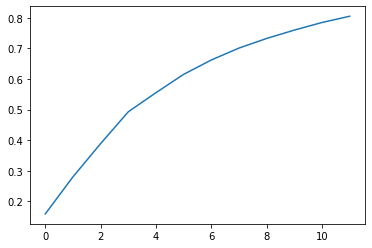

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca.fit(hou_grouped.drop(['Zipcode'], axis=1))
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
principalComponents = pca.fit_transform(hou_grouped.drop(['Zipcode'], axis=1))
principal_df = pd.DataFrame(data = principalComponents)
principal_df.head()

principal_df['Zipcode'] = hou_grouped['Zipcode']
principal_df.head()

In [43]:
# merge venue data with zip code dataframe with lat, lon, and crime
#zipcode_df.drop(columns!={'Restaurant', 'Accessories Store','Art Gallery','Art Museum','Athletics & Sports',
                          #'Athletics & Sports','Bakery','Bar','Basketball Court','Basketball Stadium',
                          #'Bookstore','Boutique','Clothing Store','Coffee Shop','Concert Hall','Convenience Store',
                          #'Doctor's Office','Fast Food Restaurant','Food'}
houston_df = pd.merge(hou_df, hou_grouped, on='Zipcode', how='inner')
print(houston_df.shape)
houston_df.head()

(42, 191)


,Zipcode,Name,County,Alias,crime_count,Population,crime_per_capita,Latitude,Longitude,ATM,Airport Terminal,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Clothing Store,Coffee Shop,College Theater,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Doctor's Office,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Event Service,Eye Doctor,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,General Travel,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gymnastics Gym,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kids Store,Kitchen Supply Store,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Moving Target,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Print Shop,Pub,Record Shop,Recreation Center,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Szechuan Restaurant,Taco Place,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vehicle Inspection Station,Video Store,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,77005,Houston - Inner Loop,HARRIS,"HOUSTON,SOUTHSIDE PLACE,WEST UNIVERSITY PLACE,...",1021,25528.0,3.999530,29.717529,-95.42821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,77080,Houston - Northwest,HARRIS,"HOUSTON,)",2584,45275.0,5.707344,29.816866,-95.52309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0

In [44]:
# Pull in CSV with property data
value_df = pd.read_csv("property_value.csv")
value_df.dropna(axis=1, how='all',inplace =True)
value_df = value_df.rename(columns={'MAIL_ZIP':'Zipcode'})

value_df['Zipcode'] = value_df['Zipcode'].str[:5]  # get first 5 digits of zip code column
value_df['Zipcode'] = pd.to_numeric(value_df['Zipcode'], errors='coerce')
value_df = value_df.replace(np.nan, 0, regex=True)
value_df['Zipcode'] = value_df['Zipcode'].astype(int)

tex_df = pd.merge(houston_df, value_df, on='Zipcode', how='inner')
print(tex_df.shape)
tex_df.head()

/Users/brit/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15,22,24,28,29,60,65) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(209744, 259)


,Zipcode,Name,County,Alias,crime_count,Population,crime_per_capita,Latitude,Longitude,ATM,Airport Terminal,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Clothing Store,Coffee Shop,College Theater,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Doctor's Office,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Event Service,Eye Doctor,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,General Travel,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gymnastics Gym,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kids Store,Kitchen Supply Store,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Moving Target,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Print Shop,Pub,Record Shop,Recreation Center,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Szechuan Restaurant,Taco Place,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vehicle Inspection Station,Video Store,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,MAIL_ADDR_1,MAIL_CITY,MAIL_STATE,MAIL_COUNTRY,UNDELIVERABLE,STR_PFX,STR_NUM,STR_NUM_SFX,STR_NAME,STR_SFX,STR_SFX_DIR,STR_UNIT,SITE_ADDR_1,SITE_ADDR_2,SITE_ADDR_3,STATE_CLASS,SCHOOL_DIST,MAP_FACET,KEY_MAP,NEIGHBORHOOD_CODE,NEIGHBORHOOD_GROUP,MARKET_AREA_1,MARKET_AREA_1_DSCR,MARKET_AREA_2,MARKET_AREA_2_DSCR,ECON_AREA,ECON_BLD_CLASS,CENTER_CODE,YR_IMPR,YR_ANNEXED,SPLT_DT,DSC_CD,NXT_BUILDING,TOTAL_BUILDING_AREA,TOTAL_LAND_AREA,ACREAGE,CAP_ACCOUNT,SHARED_CAD_CODE,LAND_VALUE,IMPROVEMENT_VALUE,EXTRA_FEATURES_VALUE,AG_VALUE,ASSESSED VALUE,TOTAL_APPRAISAL_VALUE,TOTAL_MARKET_VALUE,PRIOR_LND_VALUE,PRIOR_IMPR_VALUE,PRIOR_X_FEATURES_VALUE,PRIOR_AG_VALUE,PRIOR_TOTAL_APPRAISED_VALUE,PRIOR_TOTAL_MARKET_VALUE,NEW_CONSTRUCTION_VALUE,TOTAL_RCN_VALUE,VALUE_STATUS,NOTICED,NOTICE_DATE,PROTESTED,CERTIFIED_DATE,LAST_INSPECTED_DATE,LAST_INSPECTED_BY,NEW_OWNER_DATE,LEGAL_DSCR_1,LEGAL_DSCR_2,LEGAL_DSCR_3,LEGAL_DSCR_4,JURS,land_sqft_value,improvement_sqft_value
0,77005,Houston - Inner Loop,HARRIS,"HOUSTON,SOUTHSIDE PLACE,WEST UNIVERSITY PLACE,...",1021,25528.0,3.99953,29.717529,-95.42821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.

In [63]:
columns_to_delete = ['MAIL_ADDR_1', 
                      'MAIL_COUNTRY', 'UNDELIVERABLE', 'STR_PFX', 'STR_NUM', 'STR_NUM_SFX', 
                      'STR_NAME', 'STR_SFX', 'STR_SFX_DIR', 'STR_UNIT', 'SITE_ADDR_1', 
                      'SITE_ADDR_2', 'SITE_ADDR_3', 'STATE_CLASS', 'MAP_FACET', 'KEY_MAP', 
                      'NEIGHBORHOOD_CODE', 'NEIGHBORHOOD_GROUP', 'MARKET_AREA_1', 
                      'MARKET_AREA_1_DSCR', 'MARKET_AREA_2', 'MARKET_AREA_2_DSCR', 'ECON_AREA', 
                      'ECON_BLD_CLASS', 'CENTER_CODE', 'YR_ANNEXED', 'SPLT_DT', 'DSC_CD', 
                      'NXT_BUILDING', 'ACREAGE', 'CAP_ACCOUNT', 'SHARED_CAD_CODE', 
                      'EXTRA_FEATURES_VALUE', 'AG_VALUE', 'ASSESSED VALUE', 
                      'TOTAL_APPRAISAL_VALUE', 'TOTAL_MARKET_VALUE', 'PRIOR_LND_VALUE', 
                      'PRIOR_IMPR_VALUE', 'PRIOR_X_FEATURES_VALUE', 'PRIOR_AG_VALUE', 
                      'PRIOR_TOTAL_APPRAISED_VALUE', 'PRIOR_TOTAL_MARKET_VALUE', 
                      'NEW_CONSTRUCTION_VALUE', 'TOTAL_RCN_VALUE', 'VALUE_STATUS', 
                      'NOTICED', 'NOTICE_DATE', 'PROTESTED', 'CERTIFIED_DATE', 
                      'LAST_INSPECTED_DATE', 'LAST_INSPECTED_BY', 'NEW_OWNER_DATE', 
                      'LEGAL_DSCR_1', 'LEGAL_DSCR_2', 'LEGAL_DSCR_3', 'LEGAL_DSCR_4', 'JURS',
                     'Name','County','Alias', 'MAIL_CITY','MAIL_STATE','LAND_VALUE',
                     'IMPROVEMENT_VALUE', 'TOTAL_BUILDING_AREA', 'improvement_sqft_value']
model_df = tex_df.drop(columns_to_delete, axis=1)
print(model_df.shape)
model_df.head()

(209744, 192)


,Zipcode,crime_count,Population,crime_per_capita,Latitude,Longitude,ATM,Airport Terminal,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Clothing Store,Coffee Shop,College Theater,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Doctor's Office,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Event Service,Eye Doctor,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,General Travel,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gymnastics Gym,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kids Store,Kitchen Supply Store,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Moving Target,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Print Shop,Pub,Record Shop,Recreation Center,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Szechuan Restaurant,Taco Place,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vehicle Inspection Station,Video Store,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,SCHOOL_DIST,YR_IMPR,TOTAL_LAND_AREA,land_sqft_value
0,77005,1021,25528.0,3.99953,29.717529,-95.42821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1930,4320,27.294907
1,77005,1021,25528.0,3.99953,29.717529,-95.42821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### Linear Regression

In [64]:
model_df['YR_IMPR'] = pd.to_numeric(model_df['YR_IMPR'], errors='coerce')
model_df = model_df[model_df['land_sqft_value'] > 5]  # filter out bad data with extremely small land value
model_df.shape

(162839, 192)

In [81]:
model_df.replace([np.inf, -np.inf], np.nan, inplace=True)
model_df.dropna(how='any', inplace=True)
model_df.shape

(150171, 192)

In [90]:
Y = model_df['land_sqft_value']
X = model_df.drop(['land_sqft_value'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_test_with_zip = X_test
X_train_with_zip = X_train
X_test = X_test.drop(['Zipcode'], axis = 1)
X_train = X_train.drop(['Zipcode'], axis = 1)

In [91]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

-7322179590.387573
[ 9.49527524e+04 -1.03529466e+04  2.17136318e+06 -6.54946232e+07
 -9.62655601e+07  1.45360103e+08  6.56317517e+07 -1.53456912e+08
 -5.18728567e+07  9.50915030e+07  4.95237199e+07  9.52391850e+06
  1.64936393e+08 -2.85055930e+07 -7.57174052e+07  1.02446346e+08
 -4.03515809e+07  2.36127208e+08  5.83040527e+07  5.83040527e+07
 -3.10064819e+08  6.33591474e+07 -5.18728567e+07  3.61425818e+07
  3.93949240e+07  7.22851636e+07  5.83040527e+07  4.05992316e+07
 -4.40903408e+07  3.61425818e+07  3.93949240e+07 -5.18728567e+07
 -5.63075066e+08 -3.19588737e+08  2.72546547e+08  1.17738582e+08
 -1.81328877e+08  3.81430321e+08  1.47222697e+08 -2.85055930e+07
 -1.13799579e+07  8.63190189e+07  2.08266687e+08 -3.75543979e+08
  3.44938777e+07  1.57989373e+08  6.43119598e+06  1.46300295e+08
  2.90142486e+08  2.08807965e+08  5.10059867e+07  3.61425818e+07
  3.61425818e+07  1.08893311e+07 -1.15006887e+07 -4.87801342e+07
  1.79878484e+08 -2.61284684e+08  8.95959751e+07 -2.61284684e+08
  4.56

In [93]:
Y_pred = regressor.predict(X_test)
Y_test = np.array(list(Y_test))
Y_pred = np.array(Y_pred)

X_test_with_zip['Y_test'] = Y_test
X_test_with_zip['Y_pred'] = Y_pred

/Users/brit/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/brit/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
X_test_with_zip.head()

,Zipcode,crime_count,Population,crime_per_capita,Latitude,Longitude,ATM,Airport Terminal,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Clothing Store,Coffee Shop,College Theater,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Doctor's Office,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Event Service,Eye Doctor,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,General Travel,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gymnastics Gym,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kids Store,Kitchen Supply Store,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Moving Target,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Print Shop,Pub,Record Shop,Recreation Center,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Szechuan Restaurant,Taco Place,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vehicle Inspection Station,Video Store,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,SCHOOL_DIST,YR_IMPR,TOTAL_LAND_AREA,Y_test,Y_pred
177348,77051,2715,15085.0,17.998011,29.665430,-95.36871,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.333333,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.333333,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,1950.0,5000,5.500000,2.587200
183583,77006,3669,19664.0,18.658462,29.741878,-95.38944,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.064516,0.0,0.0,0.0,0.0322

(0, 186.99675723195284)

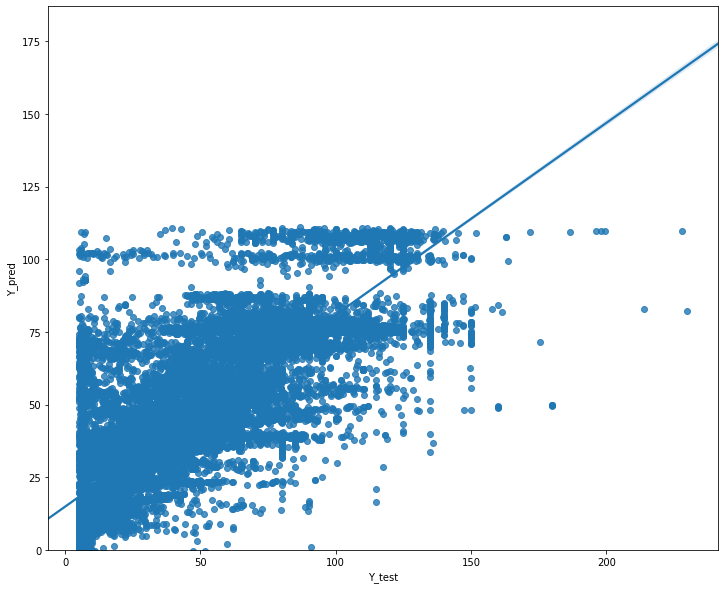

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Y_test", y="Y_pred", data=X_test_with_zip)
plt.ylim(0,)

In [96]:
#model_df.groupby("Zipcode", as_index=True)[['prediction', 'land_sqft_value']].mean()
X_test_with_zip.groupby('Zipcode')[['Y_pred', 'Y_test']].mean().reset_index()
#model_df.groupby('Zipcode')[['land_sqft_value']].sum().reset_index()
#model_df.groupby("Zipcode", as_index=True)[['land_sqft_value']].mean()

,Zipcode,Y_pred,Y_test
0,77002,54.442790,54.725795
1,77003,37.151528,37.355398
2,77004,33.960957,34.648179
3,77005,104.682958,103.625367
4,77006,74.258019,74.075675
5,77007,73.531649,73.213554
6,77008,50.154121,50.107392
7,77009,39.575837,39.713687
8,77010,38.778372,56.140215
9,77011,12.368853,11.634742


In [97]:
print (model_df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
model_df.to_csv("model_result.csv")